# Data visualization project
## Ford GoBike analisys and visualization
<span style="color:lightslategray;font-size:12px;">By Andrés Pozuelo, May-2019</span>
## Index
- [What is Ford GoBike?](#whatis)
- [Gathering data and Create a dataset](#create)
- [Assessing Data](#asse)
- [Cleaning Data](#clean)
- [Answering the questions](#answer)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

### What is Ford GoBike? <a id='whatis'></a>
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Gathering data and Create a dataset<a id='create'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

import plotly.plotly as py
import plotly.graph_objs as go

import os
import glob

%matplotlib inline
from matplotlib.sankey import Sankey

In [2]:
all_files = glob.glob(os.path.join('csv\*.csv'))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
#df.to_csv('gobike.csv', index=False)

#### Original structure
This first dataset has more than 2.7 million records in 16 columns and includes records from 2018-01-01 to 2019-09-30.

In [3]:
print(df['start_time'].min())
print(df['start_time'].max())
print(df.shape)
print(df.dtypes)

2018-01-01 00:01:53.8470
2019-04-30 23:59:04.7390
(2734625, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### Assessing data<a id='asse'></a>

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1743364,1392,2018-12-28 11:39:22.7210,2018-12-28 12:02:34.9160,368.0,Myrtle St at Polk St,37.785434,-122.419622,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,5463,Customer,1986.0,Male,No
87787,293,2018-01-03 17:59:06.9650,2018-01-03 18:04:00.7100,14.0,Clay St at Battery St,37.795001,-122.399970,323.0,Broadway at Kearny,37.798014,-122.405950,3621,Subscriber,1991.0,Male,No
380593,518,2018-04-17 08:19:19.2300,2018-04-17 08:27:58.1730,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3386,Subscriber,1984.0,Male,No
2059138,830,2019-02-28 17:14:54.2820,2019-02-28 17:28:44.3340,90.0,Townsend St at 7th St,37.771058,-122.402717,368.0,Myrtle St at Polk St,37.785434,-122.419622,5932,Subscriber,1981.0,Male,No
359259,3846,2018-04-21 14:44:56.3880,2018-04-21 15:49:02.6430,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,670,Customer,NaN,NaN,No
1571611,307,2018-10-04 15:31:16.5870,2018-10-04 15:36:24.0190,349.0,Howard St at Mary St,37.781010,-122.405666,60.0,8th St at Ringold St,37.774520,-122.409449,3906,Subscriber,1992.0,Male,No
2119645,763,2019-02-20 13:39:21.7630,2019-02-20 13:52:04.8810,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6235,Subscriber,1986.0,Male,No
2313378,412,2019-03-22 19:41:28.5680,2019-03-22 19:48:20.7290,383.0,Golden Gate Ave at Franklin St,37.780787,-122.421934,52.0,McAllister St at Baker St,37.777416,-122.441838,6480,Subscriber,1992.0,Male,No
396597,1486,2018-04-12 16:50:37.4780,2018-04-12 17:15:24.4050,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,250.0,North Berkeley BART Station,37.874014,-122.283019,2058,Customer,1955.0,Male,No
1347440,533,2018-09-10 08:57:20.8340,2018-09-10 09:06:13.9710,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3690,Subscriber,1989.0,Female,No


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null object
end_time                   2734625 non-null object
start_station_id           2722124 non-null float64
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2722124 non-null float64
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null int64
user_type                  2734625 non-null object
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null object
bike_share_for_all_trip    2734625 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 333.8+ MB


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# It is not possible so elderly users
print(df['member_birth_year'].min())
print(df['member_birth_year'].max())

1878.0
2001.0


**Quality issues**
 * It is not possible so elderly users
 * The start_time and end_time fields must be of the timestamp type
 * The user_type, member_gender and bike_share_for_all_trip field can be of the category type
 * Añadir columnas de año, mes, día, semana y hora

### Cleaning Data<a id='clean'></a>

In [8]:
# Copy data
df_clean = df.copy()

#### Calculation of age and discarding users over 80 years

In [9]:
# create age field
df_clean['age'] = 2019-df_clean['member_birth_year']

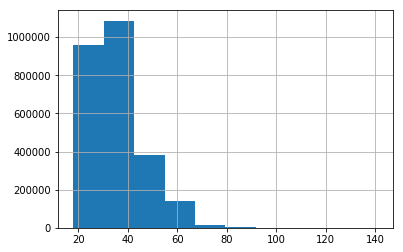

In [10]:
df_clean['age'].hist();

In [11]:
# Discarding users over 80 years and null values
df_clean = df_clean.query('age <= 80')

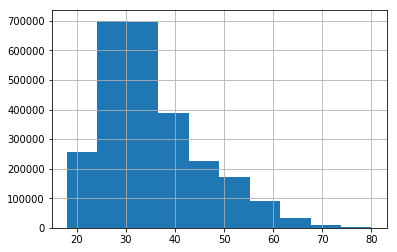

In [12]:
df_clean['age'].hist();

#### Change to timestamp type

In [13]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [14]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
age                               float64
dtype: object

#### Can be of the category type

In [15]:
df_clean.user_type = df_clean.user_type.astype('category')
# Desechamos Other gender
df_clean = df_clean.query('member_gender != "Other"')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [16]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
dtype: object

#### Add columns for year, month, week, day and hour

In [17]:
# Create columns
df_clean['start_date'] = df_clean['start_time'].dt.date
df_clean['year']=df_clean['start_time'].dt.year.astype(int)
df_clean['month']=df_clean['start_time'].dt.month.astype(int)
df_clean['week']=df_clean['start_time'].dt.strftime('%a')
df_clean['day']=df_clean['start_time'].dt.day.astype(int)
df_clean['hour']=df_clean['start_time'].dt.hour

In [18]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536612 entries, 0 to 2734624
Data columns (total 23 columns):
duration_sec               2536612 non-null int64
start_time                 2536612 non-null datetime64[ns]
end_time                   2536612 non-null datetime64[ns]
start_station_id           2524538 non-null float64
start_station_name         2524538 non-null object
start_station_latitude     2536612 non-null float64
start_station_longitude    2536612 non-null float64
end_station_id             2524538 non-null float64
end_station_name           2524538 non-null object
end_station_latitude       2536612 non-null float64
end_station_longitude      2536612 non-null float64
bike_id                    2536612 non-null int64
user_type                  2536612 non-null category
member_birth_year          2536612 non-null float64
member_gender              2536612 non-null category
bike_share_for_all_trip    2536612 non-null category
age                        2536612 non-null 

#### Save the clean-master dataset

In [19]:
#df_clean.to_csv('clean_master_gobike.csv', index=False)

### What is the structure of your dataset?<a id='answer'></a>
The final structure has more than 2.5 million records in 21 columns where we can see:
- The times of the journeys
- From where and where with geolocation
- Age, gender and type of user
- The id of the bicycle and if it is shared for the all trip.

In addition columns of **year, week, month, day and hour** have been added for a better subsequent analysis

In [20]:
print(df_clean['start_time'].min())
print(df_clean['start_time'].max())
print(df_clean.shape)
print(df_clean.dtypes)

2018-01-01 00:07:41.040000
2019-04-30 23:59:04.739000
(2536612, 23)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
start_date                         object
year                                int32
month                               int32
week                               object
day                                 int32
hour    

### What is/are the main feature(s) of interest in your dataset?

- Initially I would like to see what is the general trend of monthly use, use by age and by gender in general terms
- Later I would like to check the same data with the year 2019 to see the trend.
- How many are the peak hours, the days of the week with the highest demand and if they affect the months with the lowest temperatures?
- And above all, see the flows of users going to and from where, time, and if they repeat the same flows back hours later.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- To support my research, the dataset has geolocation and time both start and end. This would be the most important for **see the behavior of the users regarding the trips.**

## Univariate Exploration<a id='uni'></a>
- I will begin this exploration with the monthly use of GoBike in 2018 and 2019, by month, week and hour.

In [21]:
grouped = df_clean.groupby('year')
grouped18 = grouped.get_group(2018)
grouped19 = grouped.get_group(2019)

# week days
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# colors
base_color = sb.color_palette()[0]
colors = ['dodgerblue', 'magenta']

# variables start/end station for station analisys
startstation18 = grouped18.groupby('start_station_name')
startstation19 = grouped19.groupby('start_station_name')

endstation18 = grouped18.groupby('end_station_name')
endstation19 = grouped19.groupby('end_station_name')

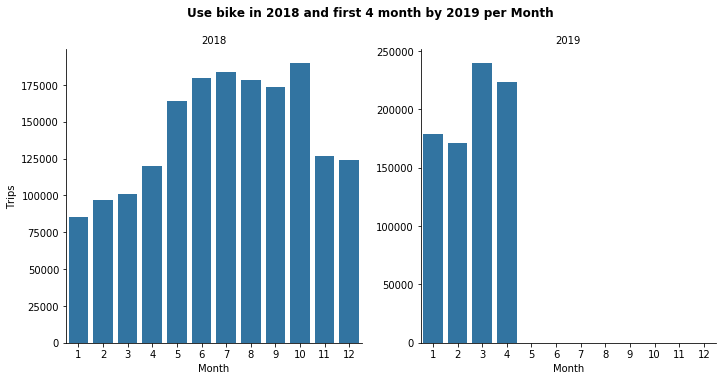

In [22]:
g = sb.catplot(data=df_clean, x='month', col="year", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Use bike in 2018 and first 4 month by 2019 per Month', y=1.05, fontsize=12, fontweight='semibold');

I see that in the colder and rainier months, there is less demand, being the months of May to October when users make more trips. What is very significant is the large increase in demand in 2019 if we compare the first 4 months of each year. **We can talk about a 100% increase in demand.** 
Later I will make a more detailed analysis. 

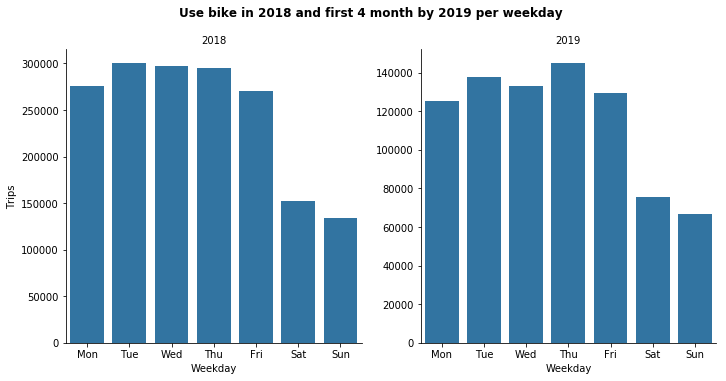

In [23]:
g = sb.catplot(data=df_clean, x='week', col="year", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Use bike in 2018 and first 4 month by 2019 per weekday', y=1.05, fontsize=12, fontweight='semibold');

It can be seen that the usage trend per day of the week is the same in 2018 as in 2019

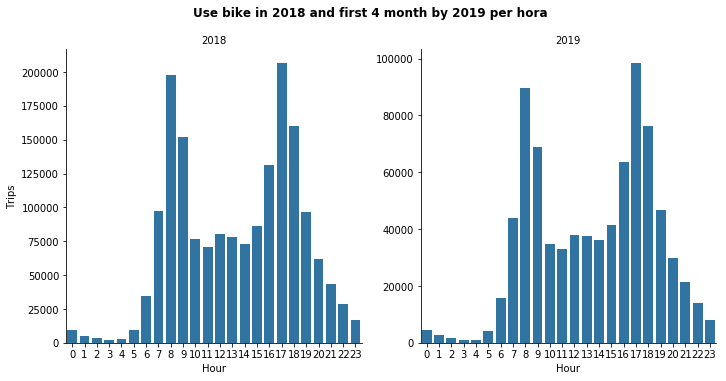

In [24]:
g = sb.catplot(data=df_clean, x='hour', col="year", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Use bike in 2018 and first 4 month by 2019 per hora', y=1.05, fontsize=12, fontweight='semibold');

The charts for 2018 and 2019 are practically traced. Two peak hours are observed, 7 AM and 17 PM and one valley from 10 AM to 15 PM. Which leads me to think that users use BoBike to get to and from work, **and that they return from work to more people on a bike than in the outbound.**
This may be because on the way out, people hurry more in bed and choose another means of transportation faster. However, on returning with more time, it is nice to relax while taking a walk. **This last one is very interesting and I will try to explain it later.**

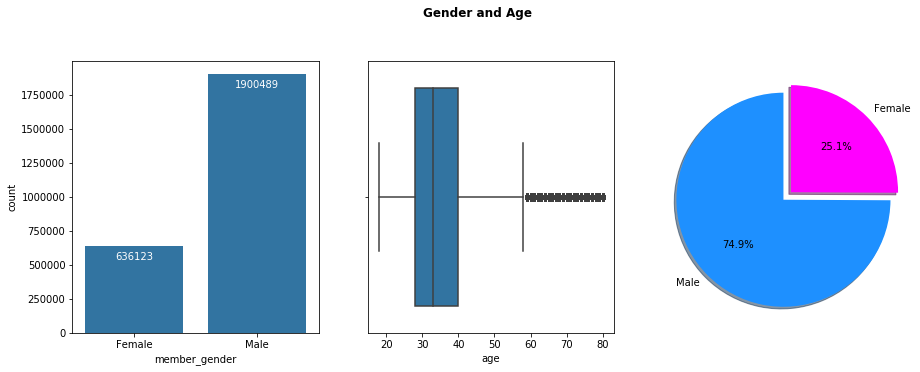

In [25]:
plt.figure(figsize = [15, 5])

# bar
plt.subplot(131)

sb.countplot(data = df_clean, x = 'member_gender', color = base_color)

# add annotations
n_points = df_clean.shape[0]
cat_counts = df_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-100000, pct_string, ha = 'center', color = 'w')

# age
plt.subplot(132)
sb.boxplot(data=df_clean, x='age', color=base_color)

# calculating male and female
plt.subplot(133)

male = df_clean.query('member_gender == "Male"')['bike_id'].count()
female = df_clean.query('member_gender == "Female"')['bike_id'].count()

labels = ['Male', 'Female']
sizes = [male, female]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Gender and Age', y=1.03, fontsize=12, fontweight='semibold');

We verified how there is a greater number of male users and that the majority are between 30 and 40 years old.

## Bivariate Exploration<a id='bi'></a>

- Total by gender and age
- Total by type of user and month

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



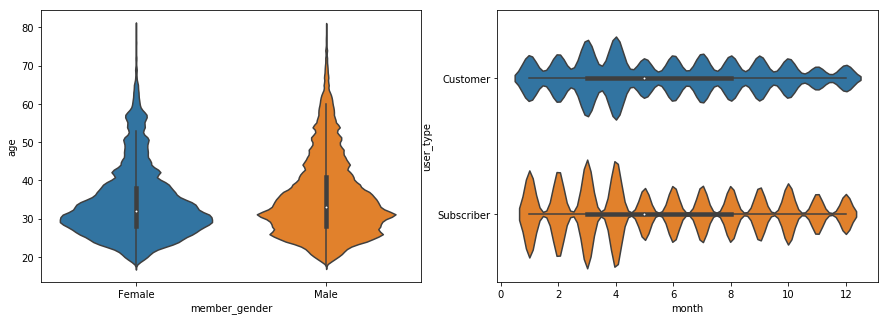

In [26]:
plt.figure(figsize = [15, 5])

plt.subplot(121)
sb.violinplot(data = df_clean, x = 'member_gender', y = 'age')

plt.subplot(122)
sb.violinplot(data = df_clean, x = 'month', y = 'user_type');

We verify that the average age is practically the same in both genders and that the months with the highest number of users are in the first 4 months of the year.

## Multivariate Exploration<a id='multi'></a>

I'm going to create datasets with new groupings to check the behavior in terms of schedules and paths of the users. 

In [27]:
# I'll just stay with the 20 most repeated trips
df_flujo = df_clean[['start_station_id', 'end_station_id', 'bike_id', 'start_station_name', 'start_station_longitude', 'start_station_latitude', 'end_station_name',
          'end_station_longitude', 'end_station_latitude', 'hour']]
ida = df_flujo.groupby(['hour', 'start_station_id', 'start_station_name', 'start_station_longitude'
                        , 'start_station_latitude'])['bike_id'].count()
vuelta = df_flujo.groupby(['hour', 'end_station_id', 'end_station_name', 'end_station_longitude'
                        , 'end_station_latitude'])['bike_id'].count()

gr_trips = df_flujo.groupby(['hour'
, 'start_station_id', 'start_station_name', 'start_station_longitude', 'start_station_latitude'
, 'end_station_id', 'end_station_name', 'end_station_longitude', 'end_station_latitude'])['bike_id'].count()

df_trips=gr_trips.sort_values(ascending=False).head(20).to_frame()

df_trips.columns = [''.join(col).strip() for col in df_trips.columns.values]
df_trips = df_trips.reset_index()
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
hour                       20 non-null int64
start_station_id           20 non-null float64
start_station_name         20 non-null object
start_station_longitude    20 non-null float64
start_station_latitude     20 non-null float64
end_station_id             20 non-null float64
end_station_name           20 non-null object
end_station_longitude      20 non-null float64
end_station_latitude       20 non-null float64
bike_id                    20 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.6+ KB


In [28]:
df_trips.head()

,hour,start_station_id,start_station_name,start_station_longitude,start_station_latitude,end_station_id,end_station_name,end_station_longitude,end_station_latitude,bike_id
0,8,196.0,Grand Ave at Perkins St,-122.256460,37.808894,182.0,19th Street BART Station,-122.268247,37.809013,1653
1,17,6.0,The Embarcadero at Sansome St,-122.403234,37.804770,16.0,Steuart St at Market St,-122.394430,37.794130,1539
2,8,15.0,San Francisco Ferry Building (Harry Bridges Pl...,-122.394203,37.795392,6.0,The Embarcadero at Sansome St,-122.403234,37.804770,1417
3,17,81.0,Berry St at 4th St,-122.393170,37.775880,15.0,San Francisco Ferry Building (Harry Bridges Pl...,-122.394203,37.795392,1344
4,8,16.0,Steuart St at Market St,-122.394430,37.794130,6.0,The Embarcadero at Sansome St,-122.403234,37.804770,1282


#### I check that the trips are usually round trip from work

In [29]:
s = df_trips.hour < 10 # ida
v = df_trips.hour > 10 # vuelta
df_ida = df_trips.where(s)
df_vuelta = df_trips.where(v)
df_ida = df_ida.dropna()
df_vuelta = df_vuelta.dropna()

In [30]:
df_ida = df_ida.sort_values(by=['hour', 'bike_id'], ascending=[True,False])
df_ida = df_ida.rename(index=str, columns={"start_station_name": "source", "end_station_name": "target", 
                                           "bike_id": "value"})

df_vuelta = df_vuelta.sort_values(by=['hour', 'bike_id'], ascending=[True,False])
df_vuelta = df_vuelta.rename(index=str, columns={"start_station_name": "source", "end_station_name": "target", 
                                           "bike_id": "value"})

In [31]:
print(df_ida.info())
print(df_vuelta.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 19 to 13
Data columns (total 10 columns):
hour                       9 non-null float64
start_station_id           9 non-null float64
source                     9 non-null object
start_station_longitude    9 non-null float64
start_station_latitude     9 non-null float64
end_station_id             9 non-null float64
target                     9 non-null object
end_station_longitude      9 non-null float64
end_station_latitude       9 non-null float64
value                      9 non-null float64
dtypes: float64(8), object(2)
memory usage: 792.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 10 to 7
Data columns (total 10 columns):
hour                       11 non-null float64
start_station_id           11 non-null float64
source                     11 non-null object
start_station_longitude    11 non-null float64
start_station_latitude     11 non-null float64
end_station_id             11 non-null float64
tar

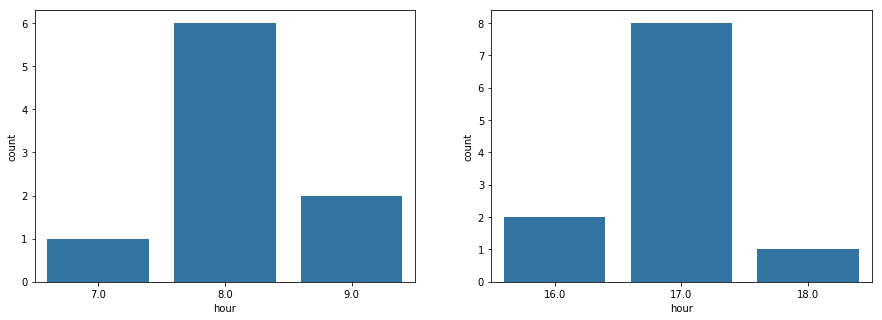

In [32]:
plt.figure(figsize = [15, 5])
# bar
plt.subplot(121)
sb.countplot(data = df_ida, x = 'hour', color = base_color)
plt.subplot(122)
sb.countplot(data = df_vuelta, x = 'hour', color = base_color);

#### We see how three schedules are repeated, one way and the other back. We can affirm that the 7 correspond to the 16, the 8 to the 17 and the 9 to the 18.

#### We can also check that more users are returning than they are, less after 18.

#### I conclude that if the return is later than 17, less users return than they are.

In [33]:
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

In [34]:
layout = Layout(width="800", height="400")
def sankey(margin_top=10, **value):
    """Show SankeyWidget with default values for size and margins"""
    return SankeyWidget(layout=layout,
                        margins=dict(top=margin_top, bottom=0, left=200, right=200),
                        **value)

In [35]:
links_ida = [
    {'source': '7:00 Bay Pl at Vernon St', 'target': '19th Street BART Station', 'value': '904', 'type': 'a'},
    {'source': '8:00 Market St at 4th St', 'target': '4th St at Harrison St', 'value': '938', 'type': 'c'},
    {'source': '8:00 Market St at 5th St', 'target': '5th St at Brannan St', 'value': '939', 'type': 'd'},
    {'source': '8:00 Bay Pl at Vernon St', 'target': '19th Street BART Station', 'value': '1089', 'type': 'a'},
    {'source': '8:00 Steuart St at Market St', 'target': 'The Embarcadero at Sansome St', 'value': '1291', 'type': 'b'},
    {'source': '8:00 Harry Bridges', 'target': 'The Embarcadero at Sansome St', 'value': '1420', 'type': 'b'},
    {'source': '8:00 Grand Ave at Perkins St', 'target': '19th Street BART Station', 'value': '1673', 'type': 'a'},
    {'source': '9:00 Berry St at 4th St', 'target': 'Howard St at Beale St', 'value': '944', 'type': 'f'},
    {'source': '9:00 Grand Ave at Perkins St', 'target': '19th Street BART Station', 'value': '1151', 'type': 'a'},
]
links_vuelta = [
    {'source': '16:00 The Embarcadero', 'target': 'Steuart St', 'value': '1090', 'type': 'a'},
    {'source': '16:00 The Embarcadero', 'target': 'San Francisco Ferry', 'value': '922', 'type': 'b'},
    {'source': '17:00 The Embarcadero', 'target': 'Steuart St', 'value': '1539', 'type': 'a'},
    {'source': '17:00 Berry St at 4th St', 'target': 'San Francisco Ferry', 'value': '1344', 'type': 'b'},
    {'source': '17:00 19th Street BART Station', 'target': 'Grand Ave', 'value': '1238', 'type': 'c'},
    {'source': '17:00 Division St at Potrero Ave', 'target': 'San Francisco Caltrain', 'value': '1420', 'type': 'd'},
    {'source': '17:00 Berry St at 5th St', 'target': 'San Francisco Ferry', 'value': '1138', 'type': 'b'},
    {'source': '17:00 Montgomery St BART ', 'target': 'San Francisco Caltrain', 'value': '917', 'type': 'd'},
    {'source': '17:00 Market St', 'target': 'San Francisco Caltrain', 'value': '900', 'type': 'd'},
    {'source': '18:00 19th Street', 'target': 'Grand Ave', 'value': '1164', 'type': 'c'},
]

In [36]:
sankey(links=links_ida, linkLabelFormat='.1f')

SankeyWidget(layout=Layout(height='400', width='800'), linkLabelFormat='.1f', links=[{'source': '7:00 Bay Pl a…

<img src="ida.png">

#### In this graph we can see where the users are going most. Normanly it will be your job.

In [37]:
sankey(links=links_vuelta, linkLabelFormat='.1f')

SankeyWidget(layout=Layout(height='400', width='800'), linkLabelFormat='.1f', links=[{'source': '16:00 The Emb…

<img src="vuelta.png">

#### And this is where they come from.

### Final analysis:

As more significant results I would highlight:
- In 2019 there is an increase of approximately 100% in GoBike users.
- The use of GoBike by men is much higher, but their age is similar, between 30 and 40 years of age.
- Its use is greater than 7:00 a.m. to 10:00 p.m. and from 4:00 p.m. to 7:00 p.m., which suggests that it is to go to and from work.
- We can also observe that more users are returning than they are. This is because in the morning most of the users go in another means of transport faster, but take the opportunity to return to GoBike.
- If the return is to occur after 18:00, the effect is the opposite, fewer people return than they were.
- Finally, the flow of people are reduced in few destinations. Possibly because that's where the jobs are.